In [1]:
import pandas as pd 
import numpy as np
from cuml.preprocessing import StandardScaler
import os
import cv2
import numpy as np
from cuml.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm 

In [11]:
BASE_PATH = "/kaggle/input/hath-food/food dataset/Images"
BINS = (16,8,8) 

In [12]:
def extract_color_histogram(image_path, bins=(16,8,8)):

    try:
        image = cv2.imread(image_path)

        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        

        hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
        
        cv2.normalize(hist, hist)
        
        return hist.flatten()
    except Exception as e:
        print(f"img sex: {image_path}: {e}")
        return None

In [13]:
def load_dataset(root_path, subset="train"):

    data = []
    labels = []
    
    path = os.path.join(root_path, subset)
    if not os.path.exists(path):
        print(f"Không tìm thấy đường dẫn: {path}")
        return np.array([]), np.array([])

    print(f"Đang load dữ liệu từ: {subset}...")
    
    # Lấy danh sách các folder con (tên món ăn)
    classes = os.listdir(path)
    
    for class_name in classes:
        class_dir = os.path.join(path, class_name)
        if not os.path.isdir(class_dir):
            continue
            
        # Duyệt qua từng file ảnh trong folder món ăn
        # Dùng tqdm để hiện thanh loading
        files = os.listdir(class_dir)
        for file in tqdm(files, desc=class_name, leave=False):
            image_path = os.path.join(class_dir, file)
            
            # Trích xuất đặc trưng
            hist = extract_color_histogram(image_path, BINS)
            
            # Nếu trích xuất thành công thì thêm vào list
            if hist is not None:
                data.append(hist)
                labels.append(class_name)
                
    return np.array(data), np.array(labels)

In [14]:
print("god bless america")
X_train, y_train_text = load_dataset(BASE_PATH, "train")
X_test, y_test_text = load_dataset(BASE_PATH, "test")


if len(X_train) == 0 or len(X_test) == 0:
    print("shit!")
else:
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')


   
    le = LabelEncoder()
    y_train = le.fit_transform(y_train_text)
    y_test = le.transform(y_test_text) 

    

god bless america
Đang load dữ liệu từ: train...


Nem chua:  22%|██▏       | 84/379 [00:01<00:05, 54.95it/s]  Corrupt JPEG data: 9 extraneous bytes before marker 0xe2


Đang load dữ liệu từ: test...


In [15]:
print(le.classes_)

print("ongoing")
model = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42, cache_size=100)
model.fit(X_train, y_train)
print("done")

print("testing...")
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"accuracy: {acc * 100:.2f}%")

print(classification_report(y_test, y_pred, target_names=le.classes_))

['Banh beo' 'Banh bot loc' 'Banh can' 'Banh canh' 'Banh chung' 'Banh cuon'
 'Banh duc' 'Banh gio' 'Banh khot' 'Banh mi' 'Banh pia' 'Banh tet'
 'Banh trang nuong' 'Banh xeo' 'Bun bo Hue' 'Bun dau mam tom' 'Bun mam'
 'Bun rieu' 'Bun thit nuong' 'Ca kho to' 'Canh chua' 'Cao lau' 'Chao long'
 'Com tam' 'Goi cuon' 'Hu tieu' 'Mi quang' 'Nem chua' 'Pho' 'Xoi xeo']
ongoing
[2025-12-10 07:48:15.934] [CUML] [warning] Warning: could not fill working set, found only 963 elements
[2025-12-10 07:48:15.945] [CUML] [warning] Warning: could not fill working set, found only 969 elements
[2025-12-10 07:48:15.950] [CUML] [warning] Warning: could not fill working set, found only 1000 elements
[2025-12-10 07:48:15.958] [CUML] [warning] Warning: could not fill working set, found only 954 elements
[2025-12-10 07:48:15.967] [CUML] [warning] Warning: could not fill working set, found only 999 elements
[2025-12-10 07:48:15.971] [CUML] [warning] Warning: could not fill working set, found only 953 elements
[2025-1

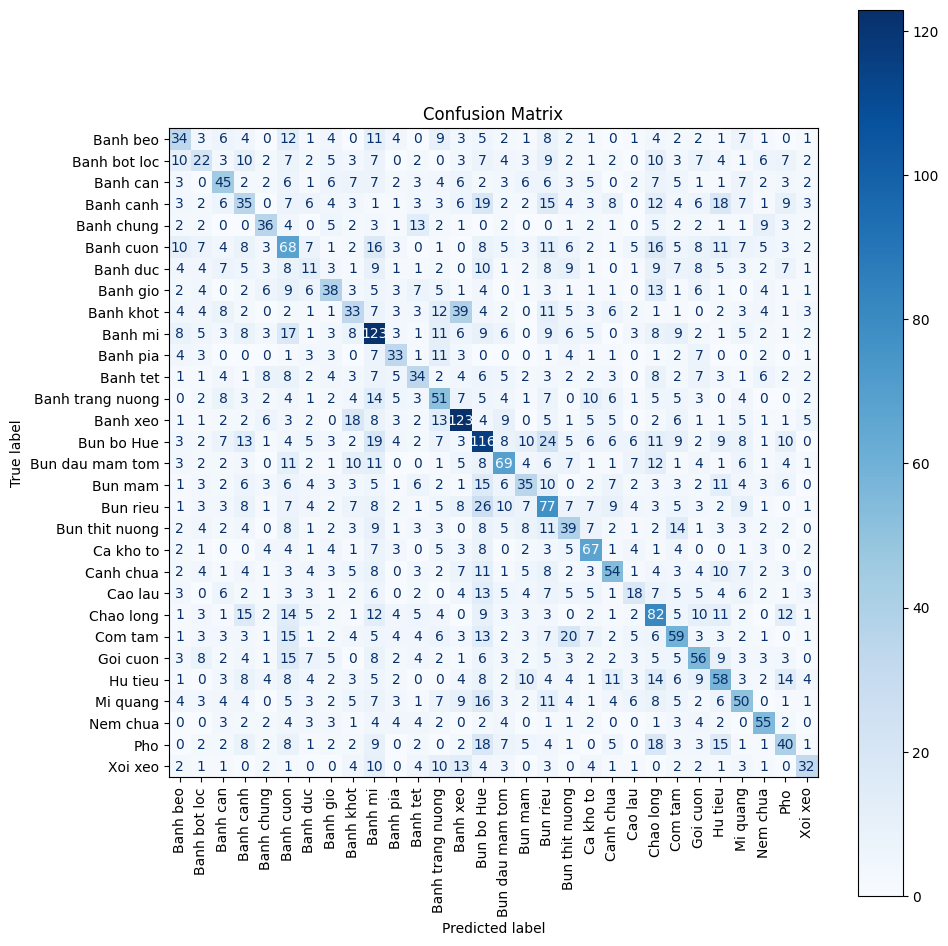

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# sau khi đã có y_test, y_pred, le.classes_

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)  # << tên class gốc đây

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
